In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [47]:
df = pd.read_csv("yield_df.csv")

In [48]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [49]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [50]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20457 entries, 0 to 20456
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           20457 non-null  object 
 1   Item                           20457 non-null  object 
 2   Year                           20457 non-null  int64  
 3   hg/ha_yield                    20457 non-null  int64  
 4   average_rain_fall_mm_per_year  20457 non-null  int64  
 5   pesticides_tonnes              20457 non-null  float64
 6   avg_temp                       20456 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.1+ MB


In [52]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,1


In [53]:
df.duplicated().sum()

1620

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.duplicated().sum()

0

In [56]:
df.shape

(18837, 7)

In [57]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,18837.000000,18837.000000,18837.000000,18837.000000,18836.000000
mean,2001.534055,77920.916600,1236.800021,42959.749005,20.808031
std,7.050855,83495.025156,725.217435,64628.451666,6.478781
min,1990.000000,578.000000,51.000000,0.000000,1.610000
25%,1995.000000,20145.000000,661.000000,1737.470000,16.900000
50%,2001.000000,40800.000000,1083.000000,28707.010000,22.260000
75%,2008.000000,106643.000000,1761.000000,56114.000000,26.180000
max,2013.000000,501412.000000,3240.000000,367778.000000,29.410000


In [58]:
# Assuming 'Area' is the problematic column containing 'Albania'
df['Area'] = pd.to_numeric(df['Area'], errors='ignore')

# Now compute the correlation, ignoring non-numeric columns
df.corr(numeric_only=True)

<ipython-input-58-c35c374a40b3>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['Area'] = pd.to_numeric(df['Area'], errors='ignore')


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.093740,-0.006803,0.157308,0.014346
hg/ha_yield,0.093740,1.000000,-0.031314,0.065368,-0.080183
average_rain_fall_mm_per_year,-0.006803,-0.031314,1.000000,0.154905,0.387774
pesticides_tonnes,0.157308,0.065368,0.154905,1.000000,0.056064
avg_temp,0.014346,-0.080183,0.387774,0.056064,1.000000


In [59]:
# Data Visualization

In [60]:
len(df['Area'].unique())

64

In [61]:
len(df['Item'].unique())

10

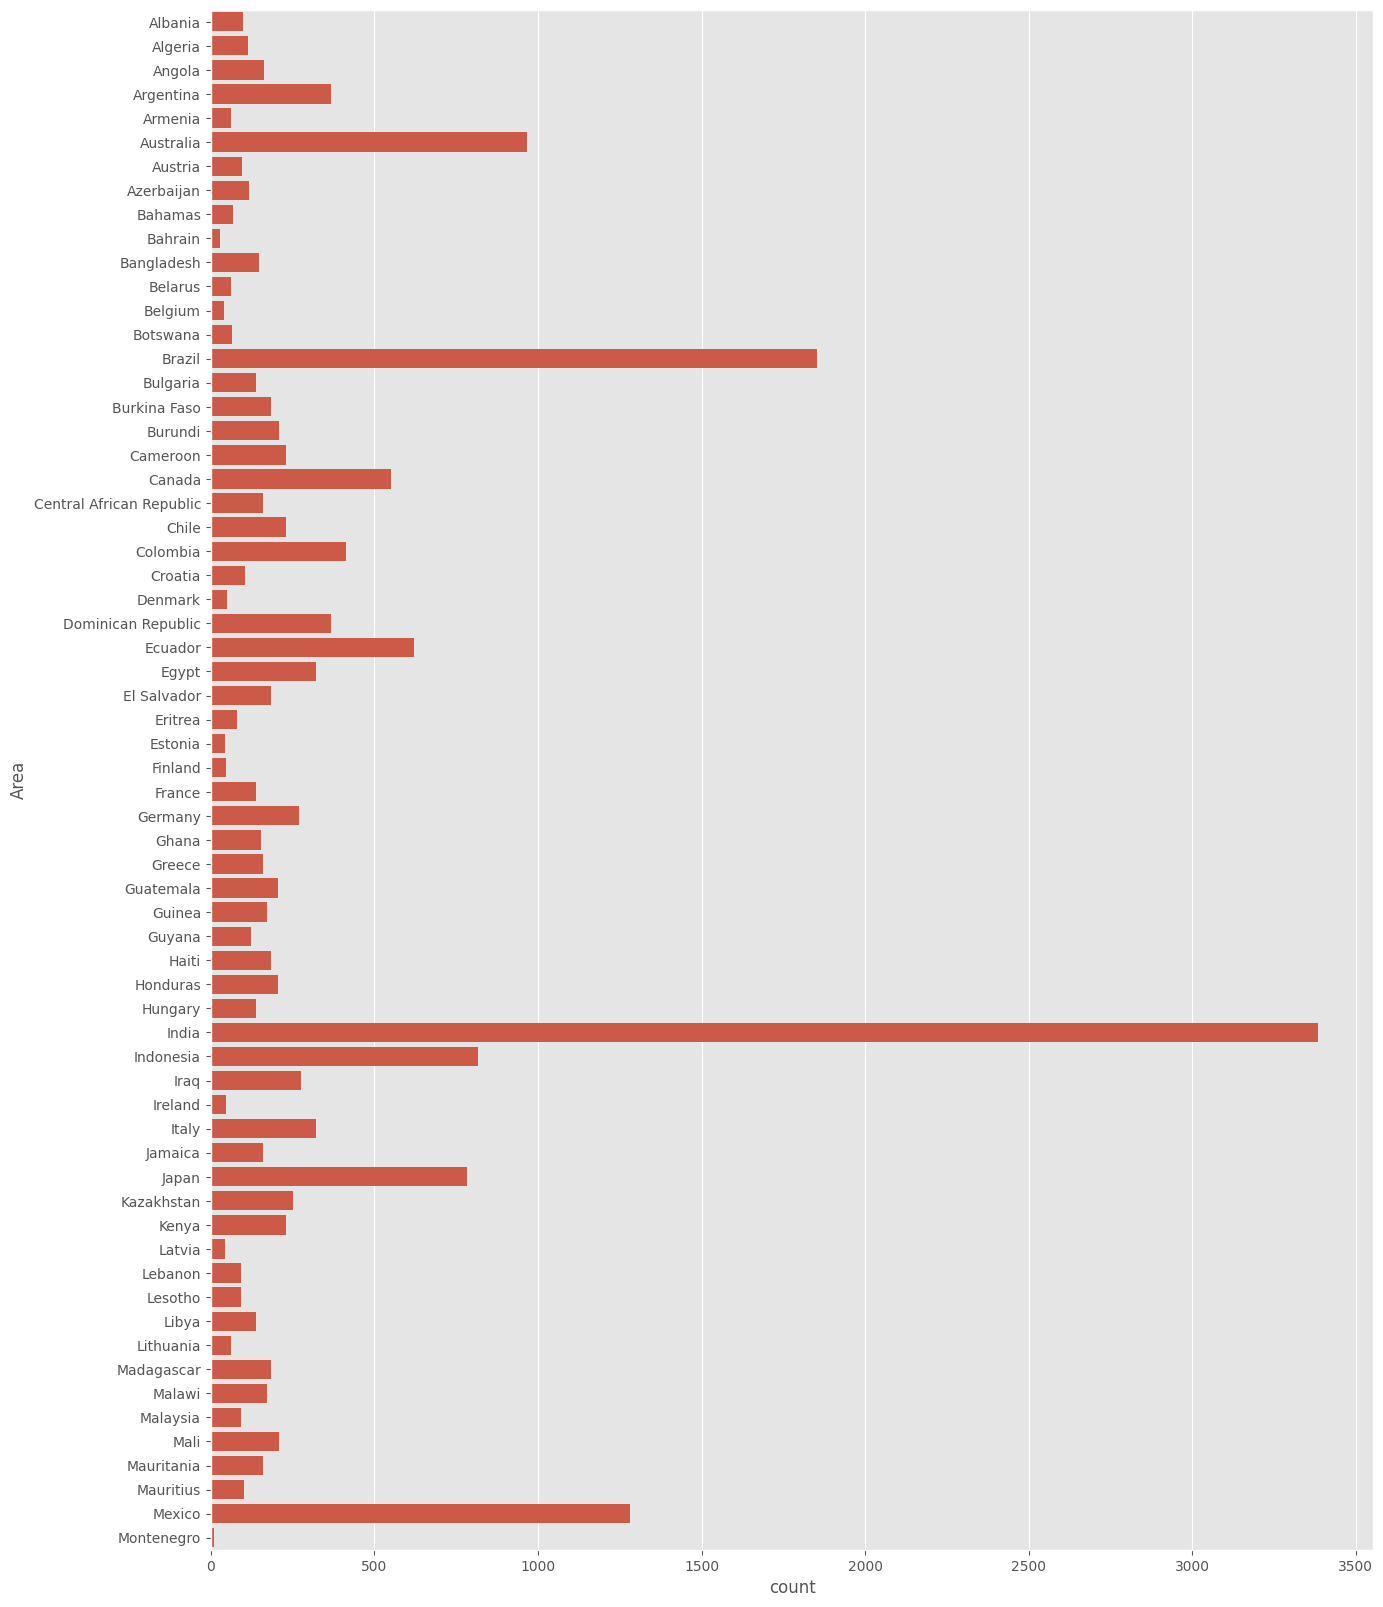

In [62]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Area'])
plt.show()

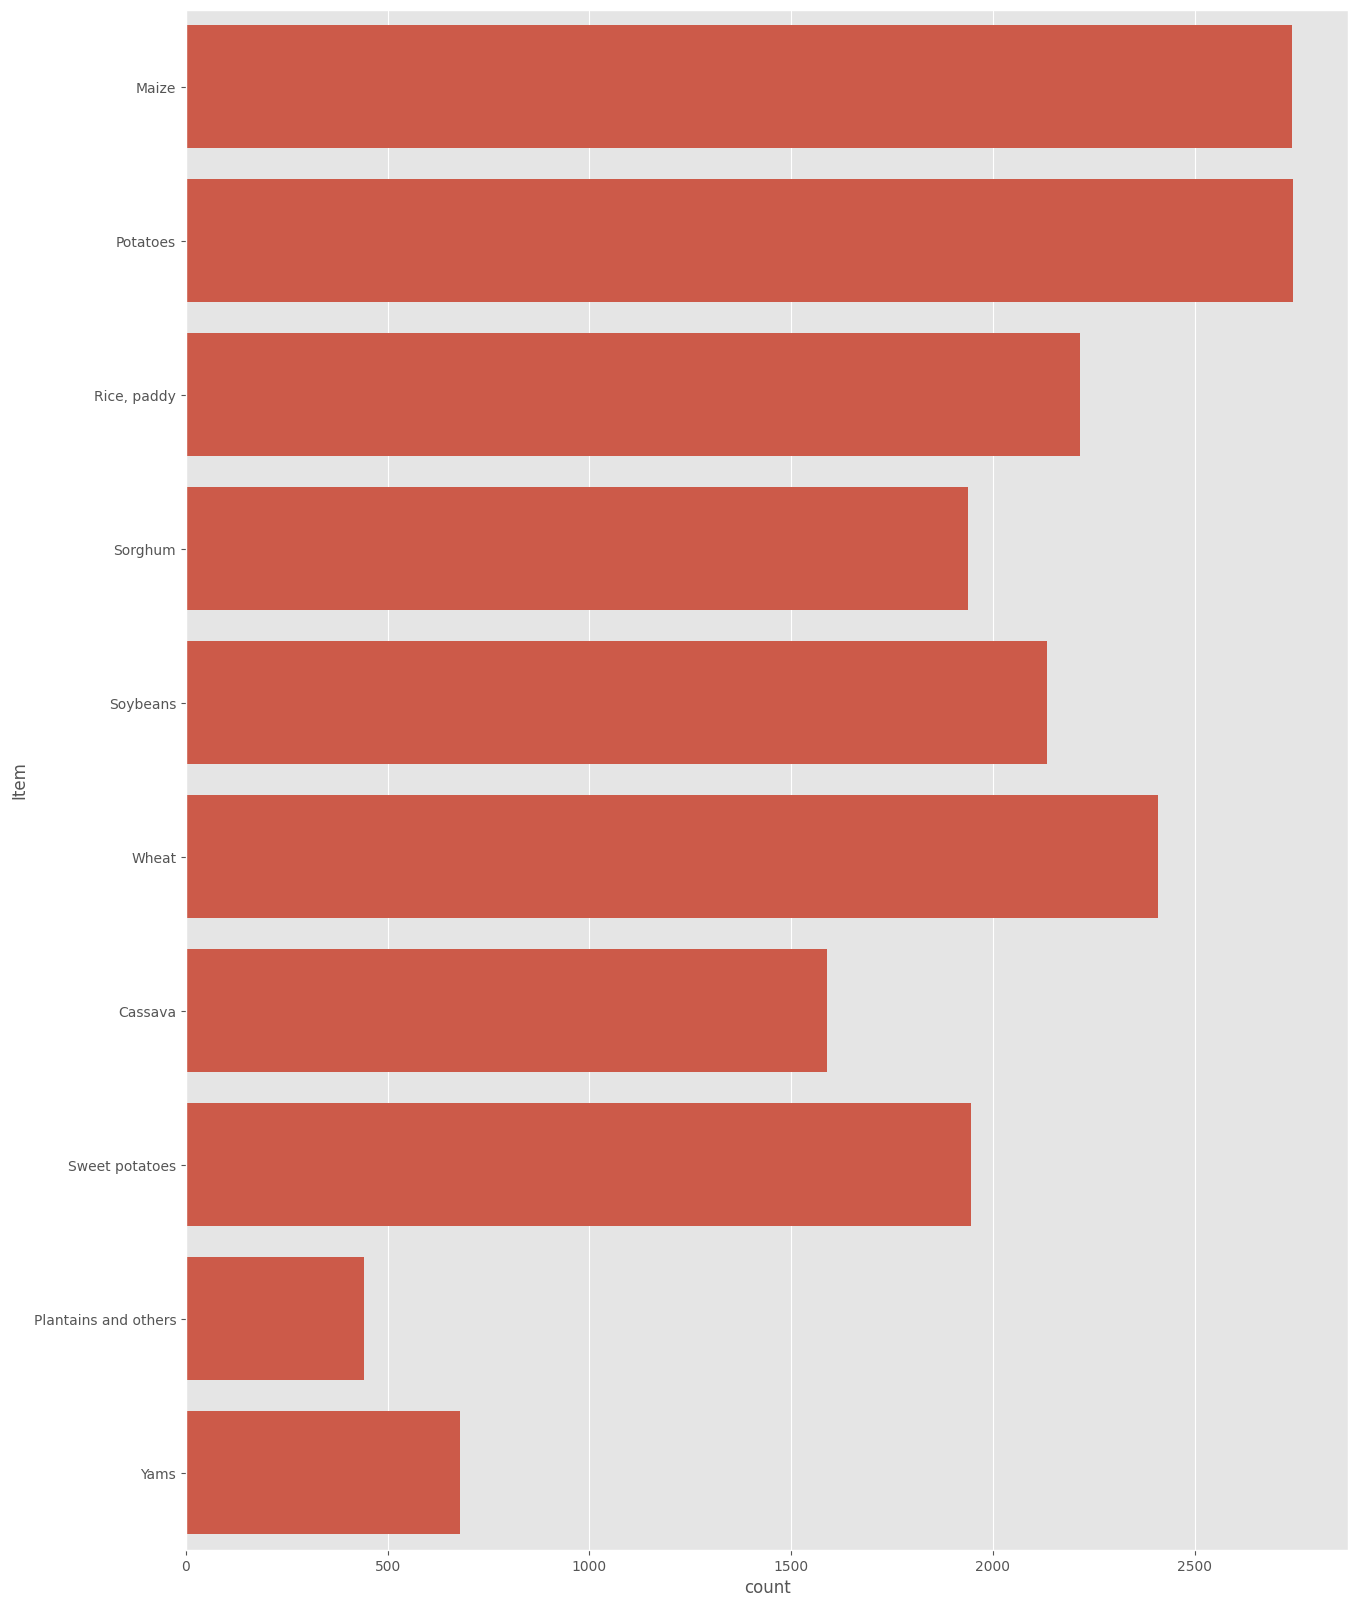

In [63]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Item'])
plt.show()

In [64]:
(df['Area'].value_counts() <400).sum()

55

In [65]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [66]:
df['hg/ha_yield'].sum()

1467796306

In [67]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 588008]

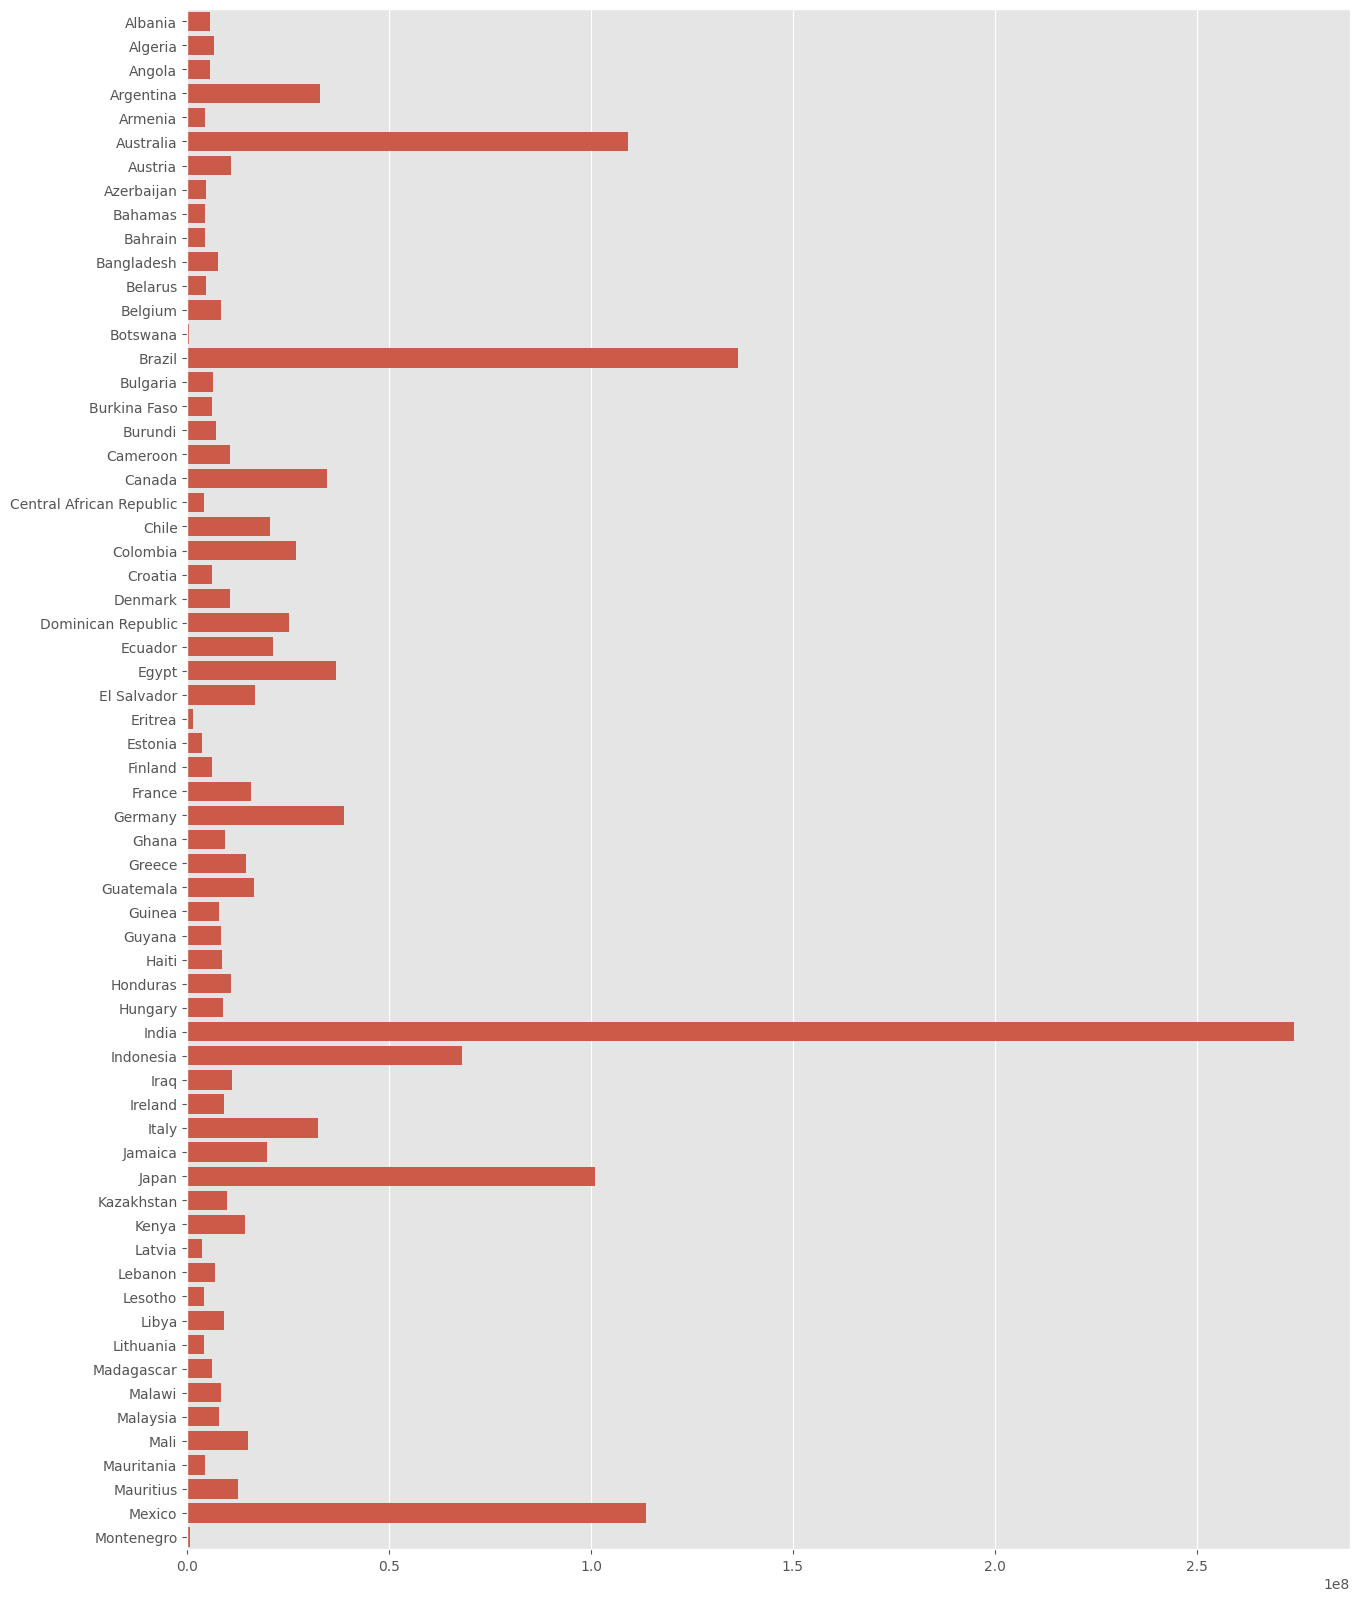

In [68]:
plt.figure(figsize=(15,20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

In [69]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

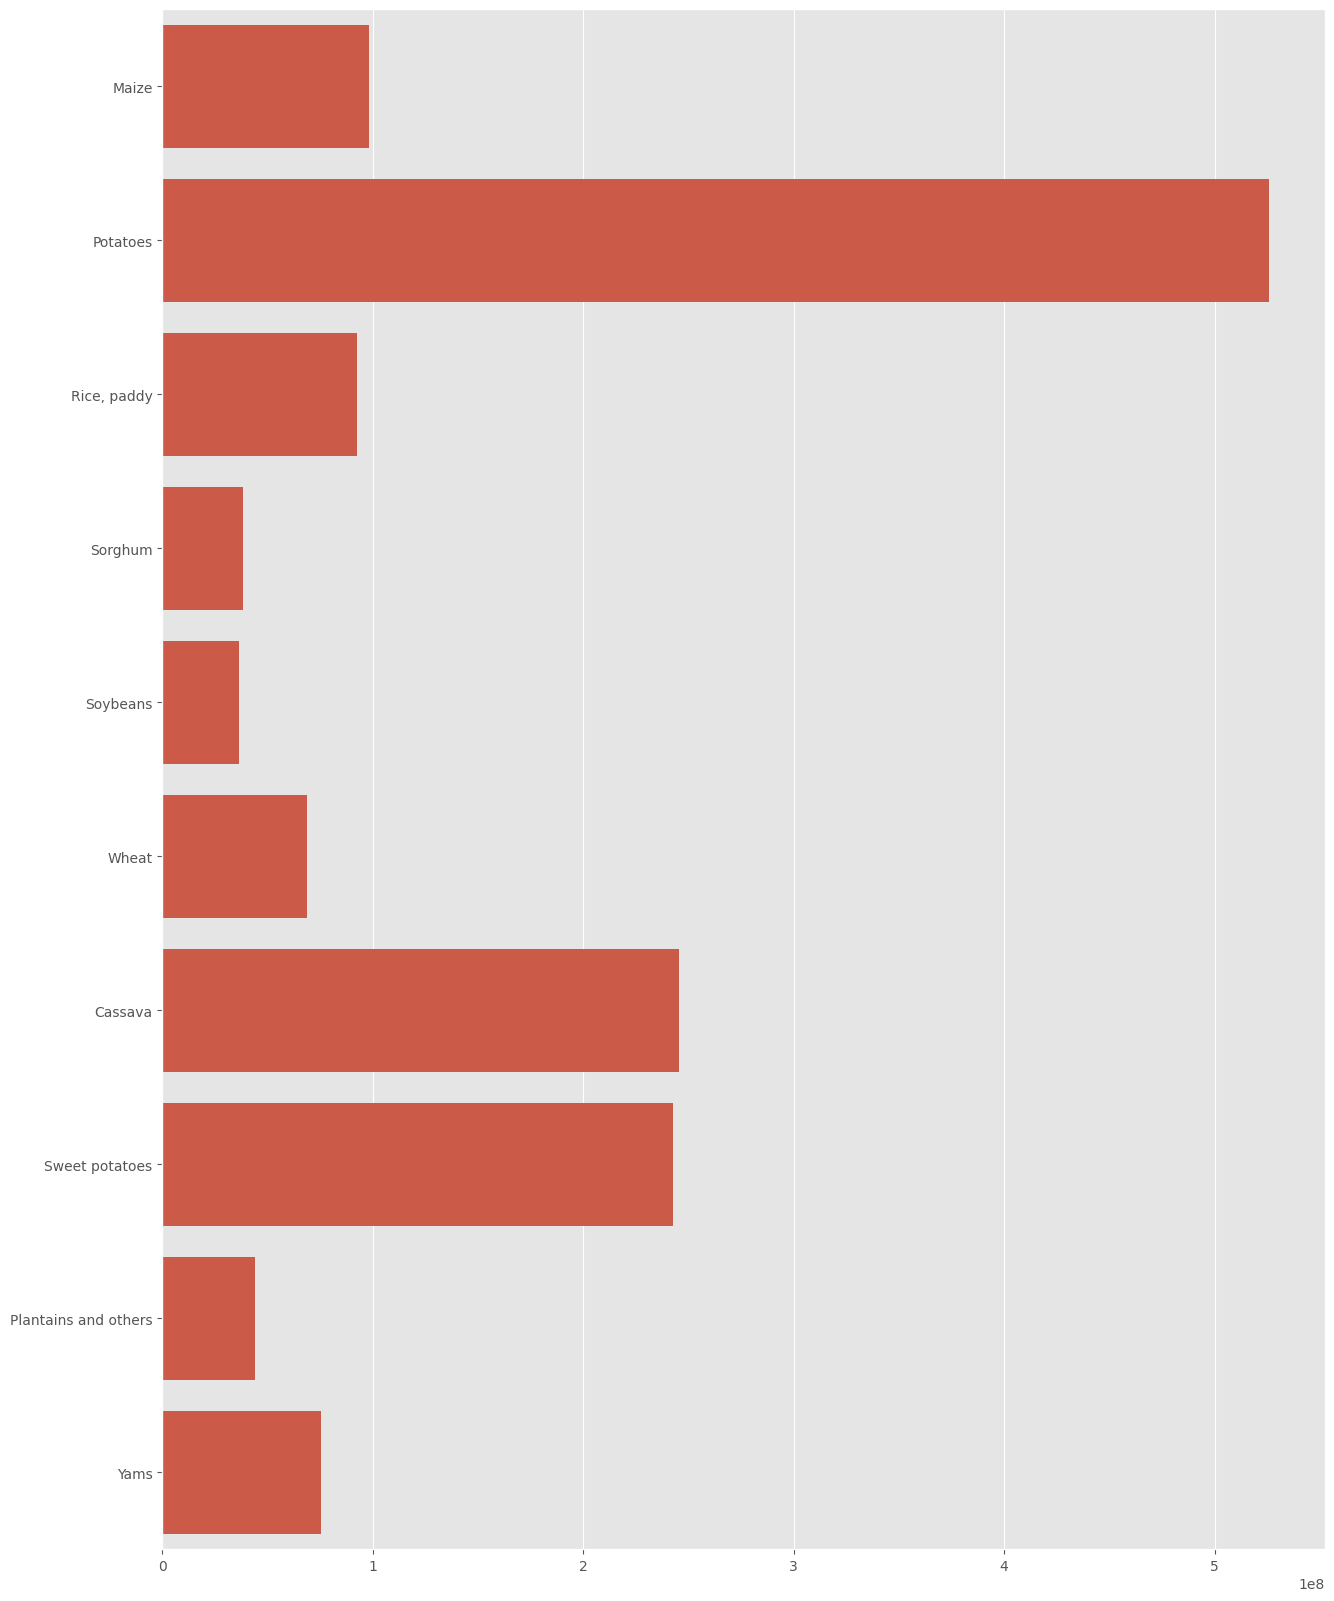

In [70]:
plt.figure(figsize=(15,20))
sns.barplot(y = crops, x = yield_per_crop)
plt.show()

In [71]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [72]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [73]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [74]:
df = df[col]

In [75]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.0,16.37,Albania,Maize,36613
1,1990,1485,121.0,16.37,Albania,Potatoes,66667
2,1990,1485,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.0,16.37,Albania,Sorghum,12500
4,1990,1485,121.0,16.37,Albania,Soybeans,7000


In [76]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [77]:
X.shape

(18837, 6)

In [78]:
y.shape

(18837,)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ],
    remainder = 'passthrough'
)

In [81]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy  = preprocesser.fit_transform(X_test)

In [82]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Algeria', 'OneHotEncode__Area_Angola',
       'OneHotEncode__Area_Argentina', 'OneHotEncode__Area_Armenia',
       'OneHotEncode__Area_Australia', 'OneHotEncode__Area_Austria',
       'OneHotEncode__Area_Azerbaijan', 'OneHotEncode__Area_Bahamas',
       'OneHotEncode__Area_Bahrain', 'OneHotEncode__Area_Bangladesh',
       'OneHotEncode__Area_Belarus', 'OneHotEncode__Area_Belgium',
       'OneHotEncode__Area_Botswana', 'OneHotEncode__Area_Brazil',
       'OneHotEncode__Area_Bulgaria', 'OneHotEncode__Area_Burkina Faso',
       'OneHotEncode__Area_Burundi', 'OneHotEncode__Area_Cameroon',
       'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'OneHotEncode__Area_Denmark',
   

In [83]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline  # Import Pipeline

# ... (Your existing code to create X_train, X_test, y_train, y_test) ...

# Create the preprocessing pipeline
preprocesser = Pipeline([
    ('preprocessing', ColumnTransformer(
        transformers=[
            ('StandardScale', StandardScaler(), [0, 1, 2, 3]),
            ('OneHotEncode', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), [4, 5])  # Update OneHotEncoder
        ],
        remainder='passthrough'
    )),
    ('imputer', SimpleImputer(strategy='mean'))  # Add imputer to the pipeline
])

# Fit and transform on the training data
X_train_dummy = preprocesser.fit_transform(X_train)

# Transform the testing data
X_test_dummy = preprocesser.transform(X_test)

In [85]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([ 92462.,  39845.,  29286., ..., 103563.,   9487., 246394.])

In [86]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [87]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.0,16.37,Albania,Maize,36613
1,1990,1485,121.0,16.37,Albania,Potatoes,66667
2,1990,1485,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.0,16.37,Albania,Sorghum,12500
4,1990,1485,121.0,16.37,Albania,Soybeans,7000


In [88]:
# Predictive System

In [89]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [90]:
result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [91]:
result

36613.0

In [92]:
import pickle
pickle.dump(dtr, open("dtr.pkl","wb"))
pickle.dump(preprocesser, open("preprocesser.pkl","wb"))